In [1]:
import numpy as np
import pandas as pd
import os
from typing import List, Optional
import ast
import seaborn as sns
import matplotlib.pyplot as plt


from results_processing import get_groups, get_dataset, flatten_results, get_top_models, plot_per_model_metrics, clean_model_names, pivot_per_dataset, plot_per_datasets, create_formatted_df

# 1. Data post-processing

In [2]:
lcn_data = clean_model_names(pd.read_csv('LcnTotalResults.csv'))
mlp_data = clean_model_names(pd.read_csv('MlpPartialResults.csv'))
multi_data = clean_model_names(pd.read_csv('MultiModalResults.csv'))

data_groups = get_groups()

In [3]:
regression_cat_groups = data_groups['opml_reg_numcat_group']
regression_num_groups = data_groups['opml_reg_purnum_group']
classification_cat_groups = data_groups['opml_class_numcat_group']
classification_num_groups = data_groups['opml_class_purnum_group']


regression_groups = regression_cat_groups + regression_num_groups
classification_groups = classification_cat_groups + classification_num_groups

In [4]:
print(f'Total number of regression datasets: {len(regression_groups)}')
print(f'Total number of classificaitondatasets: {len(classification_groups)}')
print(f'Total number of datasets: {len(regression_groups) + len(classification_groups)}')

Total number of regression datasets: 36
Total number of classificaitondatasets: 23
Total number of datasets: 59


In [5]:
lcn_reg = get_dataset(lcn_data, regression_groups)
mlp_reg = get_dataset(mlp_data, regression_groups)
multi_reg = get_dataset(multi_data, regression_groups)

lcn_cls = get_dataset(lcn_data, classification_groups)
mlp_cls = get_dataset(mlp_data, classification_groups)
multi_cls = get_dataset(multi_data, classification_groups)

reg_datasets = pd.concat([lcn_reg, mlp_reg, multi_reg], ignore_index=True)
cls_datasets = pd.concat([lcn_cls, mlp_cls, multi_cls], ignore_index=True)

In [64]:
reg_results = flatten_results(reg_datasets, ['metrics'])
cls_results = flatten_results(cls_datasets, ['metrics'])
reg_results.to_csv('regression_results.csv', index=False)
cls_results.to_csv('classification_results.csv', index=False)

In [43]:
# Grouping the baseline models
group_multimodal = ['CatBoost', 'LGBM', 'SK_histGradBoost', 'XGBoost', 'SK_gradBoost']
rename = 'baseline'
reg_results['model'] = reg_results['model'].replace(group_multimodal, rename)
cls_results['model'] = cls_results['model'].replace(group_multimodal, rename)

Index(['dataset', 'model', 'hyperparameters', 'train_loss', 'epoch',
       'val_loss', 'test_loss', 'epoch_time', 'train_metrics.RMSE',
       'train_metrics.r2_score', 'train_metrics.se_quant', 'val_metrics.RMSE',
       'val_metrics.r2_score', 'val_metrics.se_quant', 'test_metrics.RMSE',
       'test_metrics.r2_score', 'test_metrics.se_quant',
       'validate_metrics.r2_score', 'validate_metrics.RMSE',
       'validate_metrics.se_quant'],
      dtype='object')
Index(['dataset', 'model', 'hyperparameters', 'train_loss', 'val_loss',
       'test_loss', 'epoch', 'epoch_time', 'train_metrics.accuracy_score',
       'train_metrics.roc_auc_score', 'train_metrics.confusion_matrix',
       'val_metrics.accuracy_score', 'val_metrics.roc_auc_score',
       'val_metrics.confusion_matrix', 'test_metrics.accuracy_score',
       'test_metrics.roc_auc_score', 'test_metrics.confusion_matrix',
       'validate_metrics.accuracy_score', 'validate_metrics.confusion_matrix',
       'validate_metrics.ro

# 2. Analyzing results

In [44]:
top_acc_score = get_top_models(cls_results, 'val_metrics.accuracy_score')

In [45]:
top_acc_score

,dataset,model,hyperparameters,train_loss,val_loss,test_loss,epoch,epoch_time,train_metrics.accuracy_score,train_metrics.roc_auc_score,train_metrics.confusion_matrix,val_metrics.accuracy_score,val_metrics.roc_auc_score,val_metrics.confusion_matrix,test_metrics.accuracy_score,test_metrics.roc_auc_score,test_metrics.confusion_matrix,validate_metrics.accuracy_score,validate_metrics.confusion_matrix,validate_metrics.roc_auc_score
4958,337-361062,Mlp_relu,"{'depth': 11, 'seed': 42, 'regularize': None, ...",0.000646,461.861298,519.545288,60.0,243.870896,0.985317,0.998845,"[[2478, 42], [32, 2488]]",0.955159,0.990620,"[[1209, 51], [62, 1198]]",0.945282,0.988719,"[[1210, 51], [87, 1174]]",NaN,NaN,NaN
304,337-361068,LLN,"{'depth': 12, 'seed': 42, 'drop_type': 'isDrop...",0.001968,995.223022,917.247437,30.0,184.295108,0.951900,0.989550,"[[4716, 284], [197, 4803]]",0.933200,0.976689,"[[2313, 187], [147, 2353]]",0.930200,0.979867,"[[2298, 202], [147, 2353]]",NaN,NaN,NaN
3817,337-361068,Mlp_relu,"{'depth': 3, 'seed': 42, 'regularize': 'bn', '...",0.001715,959.144165,907.396606,60.0,451.511037,0.970900,0.995847,"[[4819, 181], [110, 4890]]",0.929400,0.976728,"[[2303, 197], [156, 2344]]",0.928600,0.979506,"[[2296, 204], [153, 2347]]",NaN,NaN,NaN
3826,337-361068,Mlp_sigm,"{'depth': 5, 'seed': 42, 'regularize': 'bn', '...",0.001554,967.122498,914.450195,60.0,460.041099,0.974900,0.995952,"[[4829, 171], [80, 4920]]",0.929000,0.976664,"[[2302, 198], [157, 2343]]",0.929400,0.979342,"[[2295, 205], [148, 2352]]",NaN,NaN,NaN
256,337-361068,LCN,"{'depth': 9, 'seed': 42, 'drop_type': 'isDropC...",0.005546,1623.985107,1615.484985,30.0,211.312106,0.890200,0.931102,"[[4457, 543], [555, 4445]]",0.890800,0.936683,"[[2219, 281], [265, 2235]]",0.890000,0.938082,"[[2222, 278], [272, 2228]]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310,337-361061,SK_decisionTree,"{'max_depth': 4, 'criterion': 'gini', 'max_fea...",NaN,NaN,NaN,NaN,0.056591,0.745500,0.793908,"[[3223, 1777], [768, 4232]]",NaN,NaN,NaN,0.737800,0.785929,"[[1601, 899], [412, 2088]]",0.729800,"[[1561, 939], [412, 2088]]",0.776442
8312,337-361061,SK_randomForest,"{'max_depth': None, 'n_estimators': 2445, 'cri...",NaN,NaN,NaN,NaN,142.790610,0.999600,1.000000,"[[4998, 2], [2, 4998]]",NaN,NaN,NaN,0.813600,0.897263,"[[1985, 515], [417, 2083]]",0.825200,"[[1977, 523], [351, 2149]]",0.902519
8728,334-361283,baseline,"{'learning_rate': 0.5340725437609076, 'random_...",NaN,NaN,NaN,NaN,3.974023,0.852170,0.934997,"[[2876, 442], [539, 2779]]",NaN,NaN,NaN,0.680530,0.738473,"[[1161, 498], [562, 1097]]",0.694394,"[[1196, 463], [551, 1108]]",0.764841
8729,334-361283,SK_randomForest,"{'max_depth': None, 'n_estimators': 40, 'crite...",NaN,NaN,NaN,NaN,4.396324,0.997438,0.999994,"[[3303, 15], [2, 3316]]",NaN,NaN,NaN,0.672694,0.730609,"[[1187, 472], [614, 1045]]",0.694394,"[[1221, 438], [576, 1083]]",0.752306


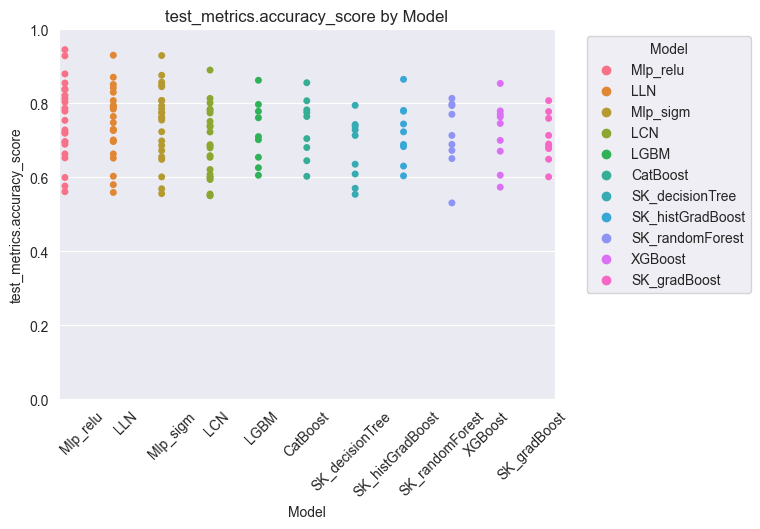

In [11]:
plot_per_model_metrics(top_acc_score, 'test_metrics.accuracy_score')

# 3. Classification

# 3.1 Per-dataset general performance

In [ ]:
top_acc_per_dataset = pivot_per_dataset(top_acc_score, 'test_metrics.accuracy_score')

In [65]:
top_acc_per_dataset.head(7)

,model,334-361110,334-361111,334-361113,334-361282,334-361283,334-361285,334-361286,337-361055,337-361060,...,337-361066,337-361068,337-361069,337-361070,337-361273,337-361274,337-361275,337-361276,337-361277,337-361278
0,LCN,0.7366,0.549947,0.7796,0.621,0.688065,0.6008,0.65836,0.751196,0.7398,...,0.773998,0.89,0.6078,0.554679,0.5994,0.7226,0.654008,0.551163,0.8134,0.6796
1,LLN,0.8076,0.579916,0.7926,0.6518,0.696805,0.7264,0.663183,0.78445,0.7948,...,0.788738,0.9302,0.6978,0.558885,0.6028,0.7478,0.701025,0.72907,0.851,0.7288
2,Mlp_relu,0.821,0.576236,0.8374,0.6526,0.696203,0.7206,0.663183,0.778947,0.8122,...,0.786092,0.9286,0.6894,0.560988,0.5994,0.754,0.696203,0.727907,0.855,0.7192
3,Mlp_sigm,0.8076,0.568875,0.8078,0.6552,0.698312,0.7624,0.672026,0.775359,0.7934,...,0.78458,0.9294,0.6484,0.555731,0.601,0.761,0.685955,0.754651,0.8574,0.7232
4,SK_decisionTree,NaN,NaN,NaN,0.5702,0.6088,0.7132,NaN,0.72823,NaN,...,0.74263,NaN,NaN,NaN,0.5538,NaN,0.635322,NaN,0.7946,NaN
5,SK_randomForest,NaN,NaN,NaN,0.6506,0.672694,0.7132,NaN,0.770335,NaN,...,0.794029,NaN,NaN,NaN,0.5306,NaN,0.688969,NaN,0.798,NaN
6,baseline,NaN,NaN,NaN,0.6448,0.68053,0.6258,NaN,0.775359,NaN,...,0.780801,NaN,NaN,NaN,0.5732,NaN,0.670585,NaN,0.8558,NaN


In [91]:
top_perf_per_data = create_formatted_df(top_acc_per_dataset)

In [93]:
top_perf_per_data.to_csv('per_dataset_acc_score.csv')

# 3.1.1 General Plots:

['334-361110', '334-361111', '334-361113', '334-361282']


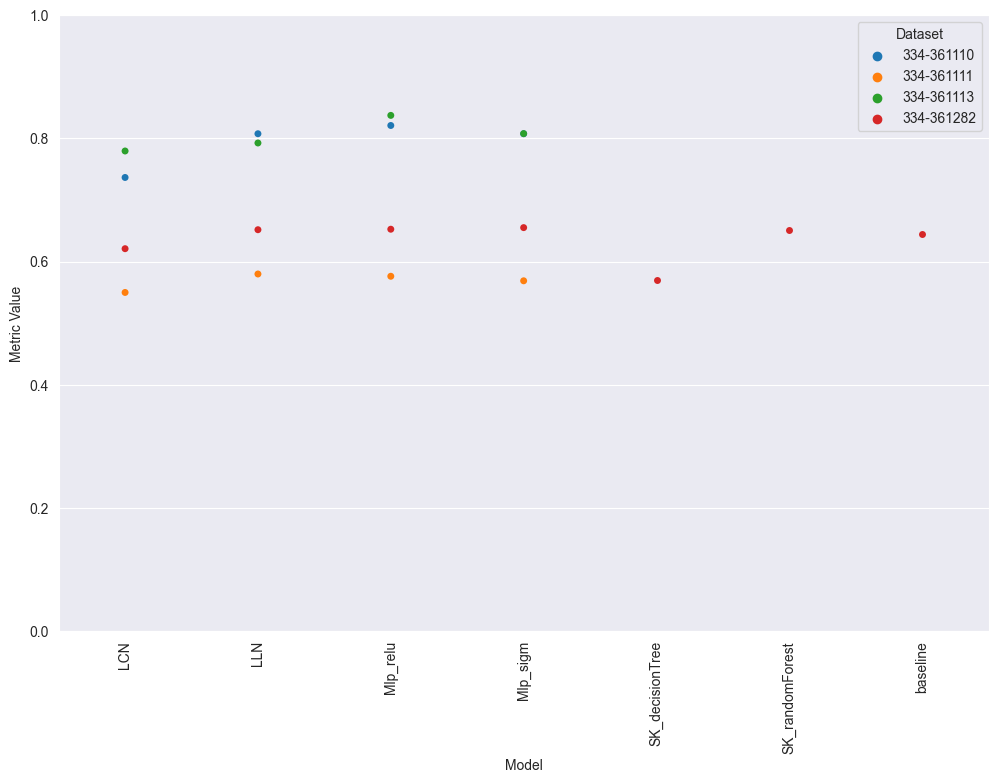

In [72]:
to_plot = top_acc_per_dataset.columns.tolist()[1:5]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['334-361283', '334-361285', '334-361286', '337-361055', '337-361060']


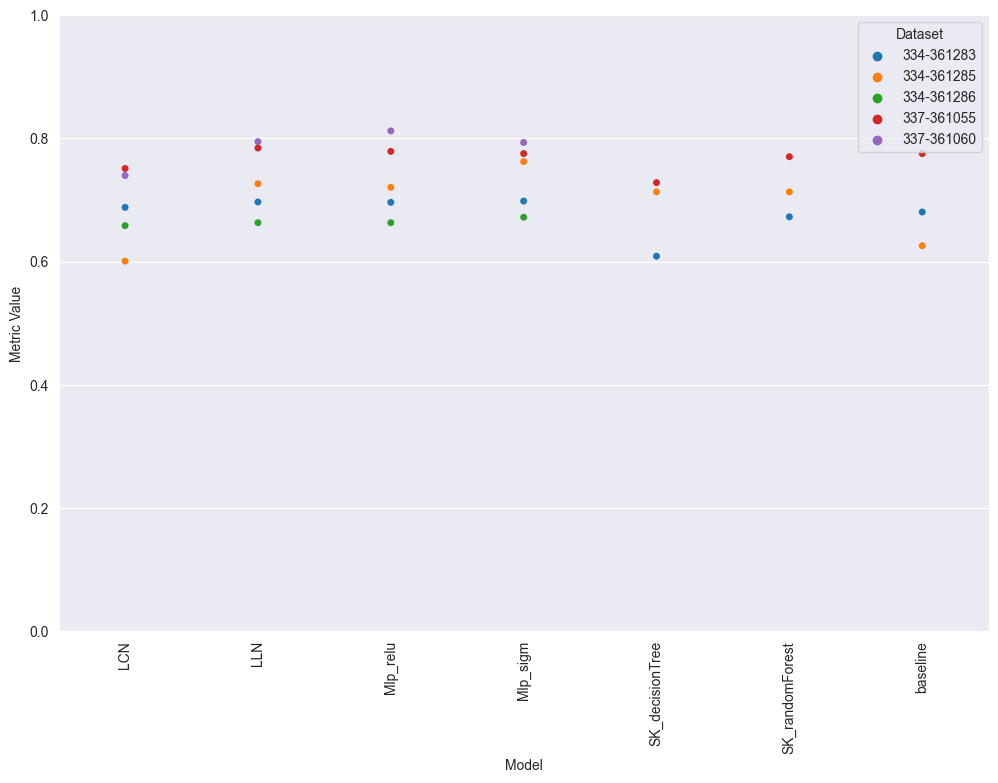

In [73]:
to_plot = top_acc_per_dataset.columns.tolist()[5:10]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['337-361061', '337-361062', '337-361063', '337-361065', '337-361066']


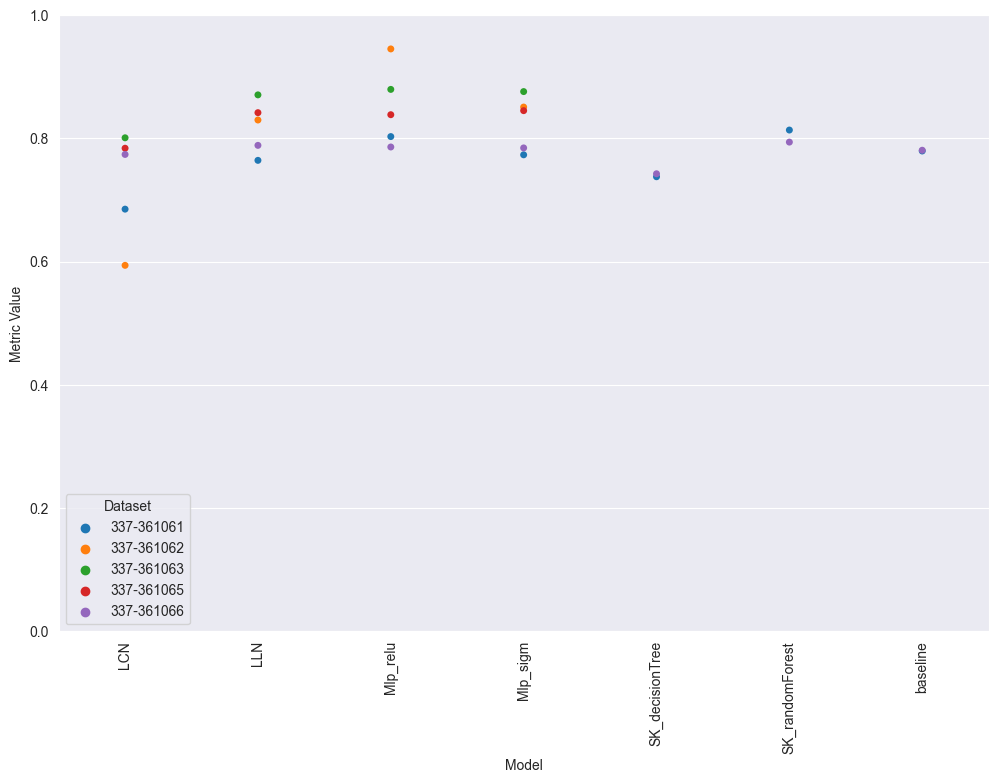

In [74]:
to_plot = top_acc_per_dataset.columns.tolist()[10:15]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['337-361068', '337-361069', '337-361070', '337-361273', '337-361274']


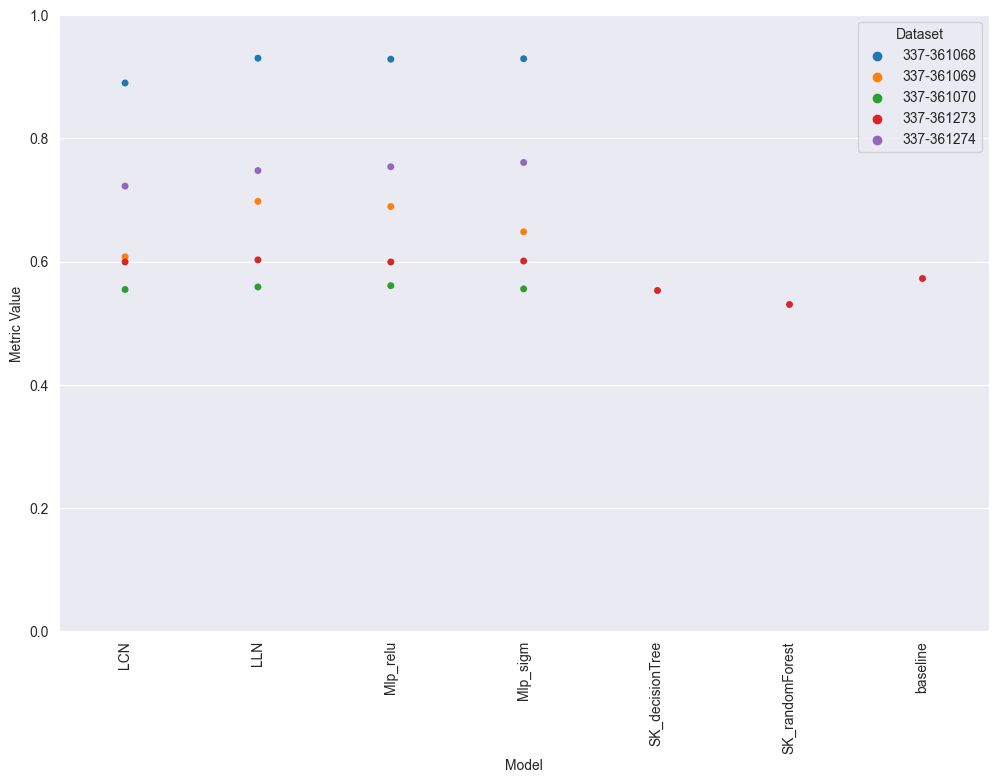

In [75]:
to_plot = top_acc_per_dataset.columns.tolist()[15:20]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['337-361275', '337-361276', '337-361277', '337-361278']


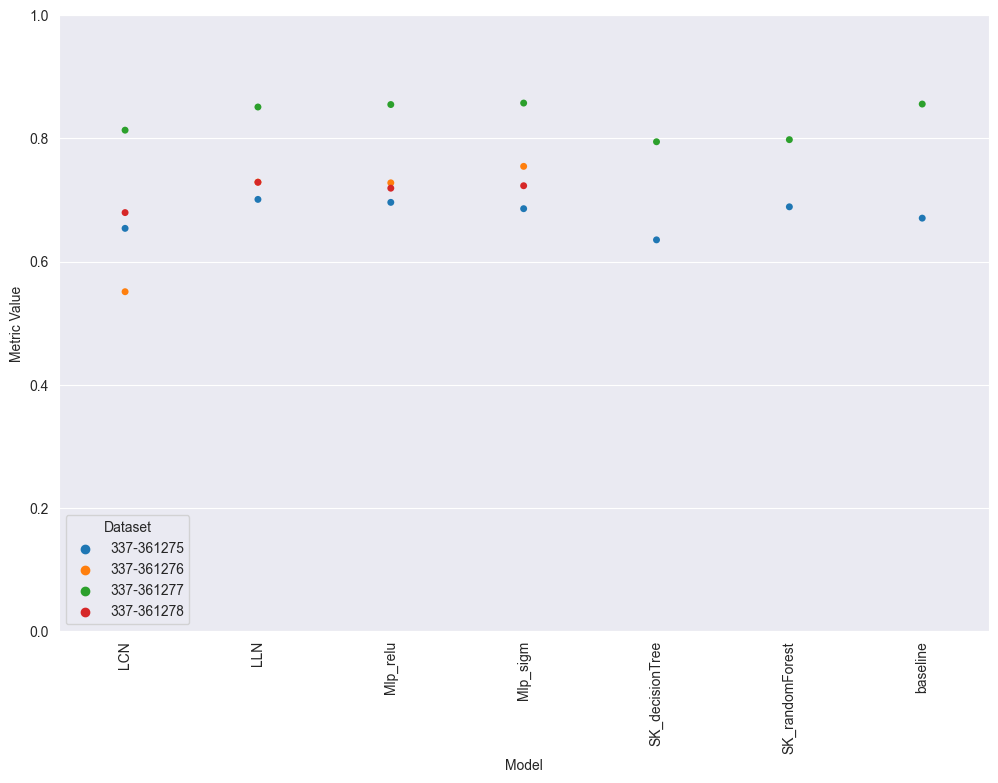

In [76]:
to_plot = top_acc_per_dataset.columns.tolist()[20:]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

In [63]:
cls_results.loc[cls_results['dataset'] == '337-361276']

,dataset,model,hyperparameters,train_loss,val_loss,test_loss,epoch,epoch_time,train_metrics.accuracy_score,train_metrics.roc_auc_score,train_metrics.confusion_matrix,val_metrics.accuracy_score,val_metrics.roc_auc_score,val_metrics.confusion_matrix,test_metrics.accuracy_score,test_metrics.roc_auc_score,test_metrics.confusion_matrix,validate_metrics.accuracy_score,validate_metrics.confusion_matrix,validate_metrics.roc_auc_score
888,337-361276,LLN,"{'depth': 8, 'seed': 42, 'drop_type': 'isDropC...",0.418140,60065.460938,48928.394531,30.0,43.660225,0.796620,0.831119,"[[696, 162], [187, 671]]",0.698135,0.718056,"[[329, 100], [159, 270]]",0.718605,0.739835,"[[324, 106], [136, 294]]",NaN,NaN,NaN
890,337-361276,LCN,"{'depth': 10, 'seed': 42, 'drop_type': 'isDrop...",0.010635,589.319824,577.931396,30.0,50.181859,0.566434,0.598395,"[[458, 400], [344, 514]]",0.540793,0.568515,"[[181, 248], [146, 283]]",0.573256,0.609375,"[[169, 261], [106, 324]]",NaN,NaN,NaN
892,337-361276,LCN,"{'depth': 11, 'seed': 42, 'drop_type': 'isDrop...",0.010670,611.361206,627.649048,30.0,54.602821,0.527389,0.548714,"[[109, 749], [62, 796]]",0.512821,0.518595,"[[34, 395], [23, 406]]",0.523256,0.525698,"[[54, 376], [34, 396]]",NaN,NaN,NaN
893,337-361276,LLN,"{'depth': 10, 'seed': 42, 'drop_type': 'isDrop...",0.286797,73569.695312,32611.007812,30.0,46.912236,0.801282,0.846386,"[[701, 157], [184, 674]]",0.712121,0.734054,"[[324, 105], [142, 287]]",0.725581,0.749386,"[[327, 103], [133, 297]]",NaN,NaN,NaN
895,337-361276,LLN,"{'depth': 9, 'seed': 42, 'drop_type': 'isDropC...",0.182284,20139.457031,26428.548828,30.0,45.502600,0.805944,0.853522,"[[691, 167], [166, 692]]",0.709790,0.735892,"[[316, 113], [136, 293]]",0.718605,0.753053,"[[321, 109], [133, 297]]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,337-361276,Mlp_relu,"{'depth': 4, 'seed': 42, 'regularize': 'bn', '...",0.000331,712.409058,713.273315,60.0,107.921132,0.998834,1.000000,"[[858, 0], [2, 856]]",0.710956,0.774317,"[[315, 114], [134, 295]]",0.704651,0.769935,"[[317, 113], [141, 289]]",NaN,NaN,NaN
5074,337-361276,Mlp_relu,"{'depth': 6, 'seed': 42, 'regularize': 'bn', '...",0.000035,662.962280,646.178406,60.0,106.444390,1.000000,1.000000,"[[858, 0], [0, 858]]",0.664336,0.745328,"[[290, 139], [149, 280]]",0.698837,0.769400,"[[295, 135], [124, 306]]",NaN,NaN,NaN
5075,337-361276,Mlp_sigm,"{'depth': 6, 'seed': 42, 'regularize': None, '...",0.010906,594.732422,596.113831,60.0,109.810258,0.500000,0.479332,"[[858, 0], [858, 0]]",0.500000,0.467532,"[[429, 0], [429, 0]]",0.500000,0.498560,"[[430, 0], [430, 0]]",NaN,NaN,NaN
5076,337-361276,Mlp_sigm,"{'depth': 3, 'seed': 42, 'regularize': 'bn', '...",0.000766,564.519165,581.007446,60.0,104.039507,0.613636,0.654267,"[[499, 359], [304, 554]]",0.601399,0.656658,"[[270, 159], [183, 246]]",0.572093,0.634749,"[[133, 297], [71, 359]]",NaN,NaN,NaN


# 3.2 Per-dataset model to model comparison

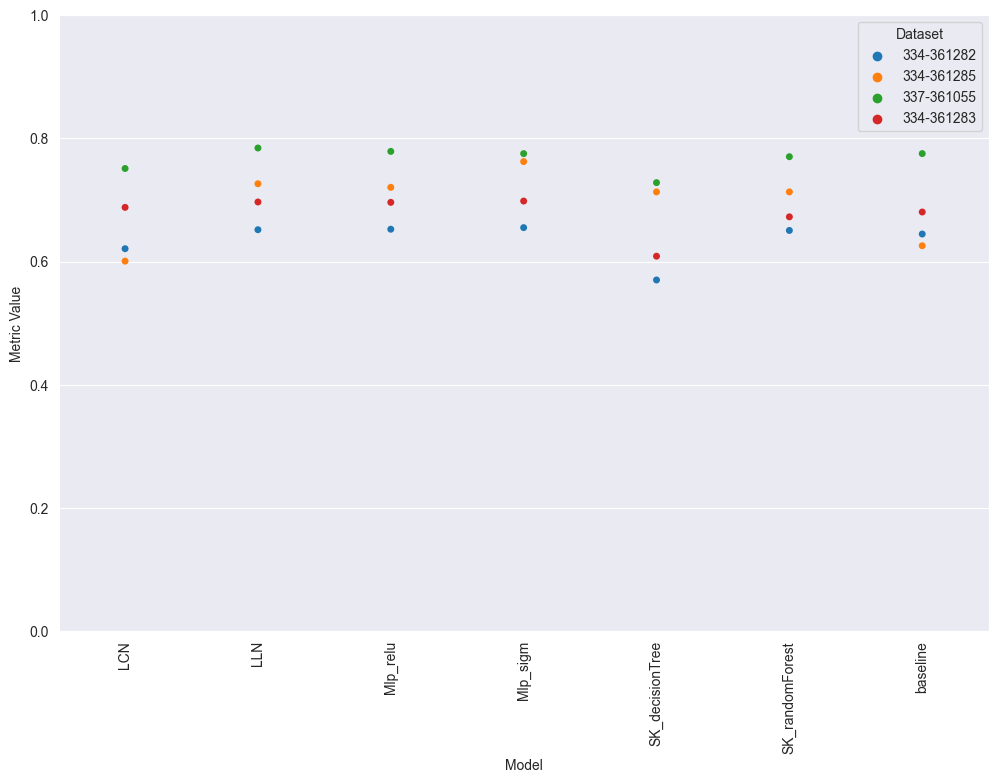

In [78]:
to_plot = ['334-361282', '334-361285', '337-361055', '334-361283', '337-361066', '337-361061', '337-361273', '337-361277', '337-361275']
plot_per_datasets(top_acc_per_dataset, to_plot[:4], scale = True)

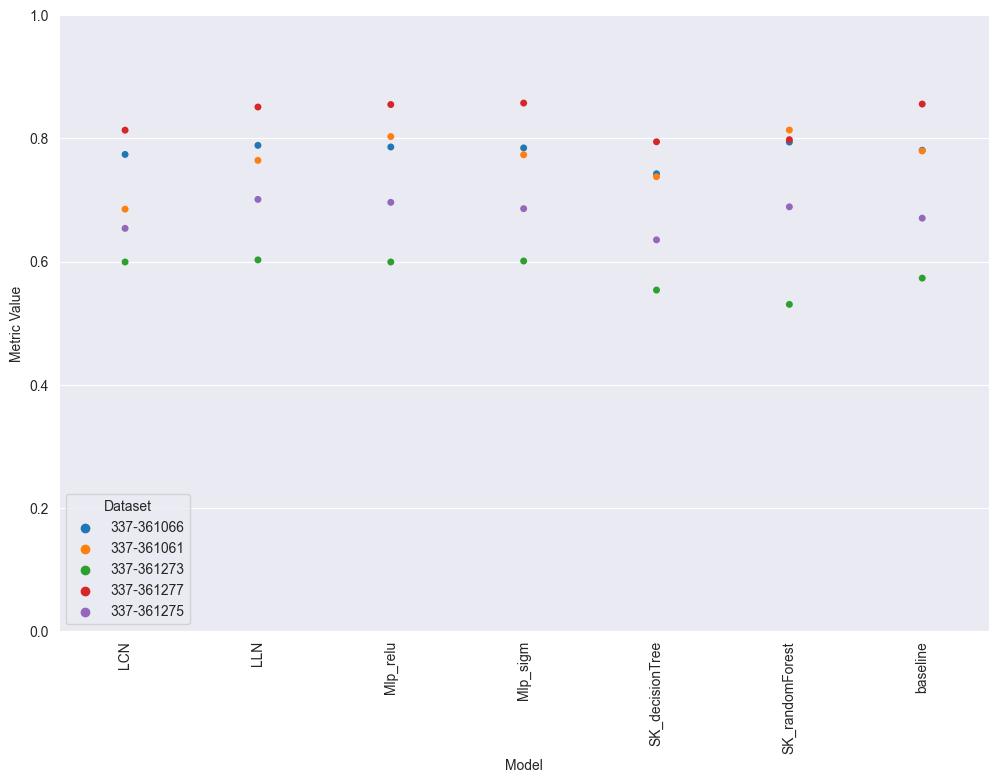

In [79]:
to_plot = ['334-361282', '334-361285', '337-361055', '334-361283', '337-361066', '337-361061', '337-361273', '337-361277', '337-361275']
plot_per_datasets(top_acc_per_dataset, to_plot[4:], scale = True)